In [484]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# Data analysis

In [1435]:
df_train=pd.read_csv("train_small.csv")

In [1436]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [374]:
df_train.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [375]:
df_stores=pd.read_csv("stores.csv")

In [376]:
df_oil=pd.read_csv("oil.csv")

In [377]:
df_holidays_events=pd.read_csv("holidays_events.csv")

In [378]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [379]:
df_train_st=df_train.merge(df_stores,on="store_nbr",how="left")

In [380]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [381]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [382]:
df_train_st_oil=df_train_st.merge(df_oil,on="date",how="left")

In [383]:
df_holidays_events.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [384]:
df_train_st_oil_holid=df_train_st_oil.merge(df_holidays_events,on="date",how="left")

In [385]:
df_train_st_oil_holid.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           3054348 non-null  int64  
 1   date         3054348 non-null  object 
 2   store_nbr    3054348 non-null  int64  
 3   family       3054348 non-null  object 
 4   sales        3054348 non-null  float64
 5   onpromotion  3054348 non-null  int64  
 6   city         3054348 non-null  object 
 7   state        3054348 non-null  object 
 8   type_x       3054348 non-null  object 
 9   cluster      3054348 non-null  int64  
 10  dcoilwtico   2099196 non-null  float64
 11  type_y       502524 non-null   object 
 12  locale       502524 non-null   object 
 13  locale_name  502524 non-null   object 
 14  description  502524 non-null   object 
 15  transferred  502524 non-null   object 
dtypes: float64(2), int64(4), object(10)
memory usage: 396.1+ MB


In [350]:
#We are missing daily oil price info for this many days
df_train_st_oil_holid["dcoilwtico"].isnull().sum()

955152

In [351]:
#These are the days that don't have any associated holiday, so we can fill corresponding info as not a holiday

In [352]:
#Rename two columns
df_train_st_oil_holid=df_train_st_oil_holid.rename({"type_x":"store_type","type_y":"day_type"},axis=1)

In [606]:
df_train_st_oil_holid.tail(10)

,date,family,sales,type_x,type_y
3054338,2017-08-15,MAGAZINES,11.000,B,Holiday
3054339,2017-08-15,MEATS,449.228,B,Holiday
3054340,2017-08-15,PERSONAL CARE,522.000,B,Holiday
3054341,2017-08-15,PET SUPPLIES,6.000,B,Holiday
3054342,2017-08-15,PLAYERS AND ELECTRONICS,6.000,B,Holiday
3054343,2017-08-15,POULTRY,438.133,B,Holiday
3054344,2017-08-15,PREPARED FOODS,154.553,B,Holiday
3054345,2017-08-15,PRODUCE,2419.729,B,Holiday
3054346,2017-08-15,SCHOOL AND OFFICE SUPPLIES,121.000,B,Holiday
3054347,2017-08-15,SEAFOOD,16.000,B,Holiday


In [354]:
df_train_st_oil_holid["day_type"].unique()

array(['Holiday', nan, 'Work Day', 'Additional', 'Event', 'Transfer',
       'Bridge'], dtype=object)

In [355]:
df_train_st_oil_holid["transferred"].unique()

array([False, nan, True], dtype=object)

In [356]:
df_train_st_oil_holid["description"].nunique()

101

In [357]:
df_train_st_oil_holid["locale"].unique()

array(['National', nan, 'Local', 'Regional'], dtype=object)

In [358]:
df_train_st_oil_holid["locale_name"].unique()

array(['Ecuador', nan, 'Manta', 'Cotopaxi', 'Cuenca', 'Libertad',
       'Riobamba', 'Puyo', 'Guaranda', 'Imbabura', 'Machala', 'Latacunga',
       'El Carmen', 'Santo Domingo', 'Cayambe', 'Guayaquil', 'Esmeraldas',
       'Ambato', 'Ibarra', 'Quevedo', 'Santo Domingo de los Tsachilas',
       'Santa Elena', 'Quito', 'Loja', 'Salinas'], dtype=object)

In [359]:
df_train_st_oil_holid["day_type"].fillna("Regular Day",inplace=True)
df_train_st_oil_holid["locale"].fillna("National",inplace=True)
df_train_st_oil_holid["locale_name"].fillna("Ecuador",inplace=True)
df_train_st_oil_holid["transferred"].fillna("False",inplace=True)
df_train_st_oil_holid["description"].fillna("Not a holiday",inplace=True)

In [360]:
df_train_st_oil_holid.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           3054348 non-null  int64  
 1   date         3054348 non-null  object 
 2   store_nbr    3054348 non-null  int64  
 3   family       3054348 non-null  object 
 4   sales        3054348 non-null  float64
 5   onpromotion  3054348 non-null  int64  
 6   city         3054348 non-null  object 
 7   state        3054348 non-null  object 
 8   store_type   3054348 non-null  object 
 9   cluster      3054348 non-null  int64  
 10  dcoilwtico   2099196 non-null  float64
 11  day_type     3054348 non-null  object 
 12  locale       3054348 non-null  object 
 13  locale_name  3054348 non-null  object 
 14  description  3054348 non-null  object 
 15  transferred  3054348 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 396.1+ MB


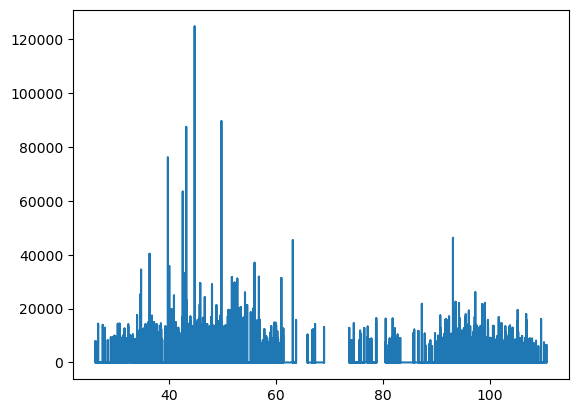

In [361]:
plt.plot(df_train_st_oil_holid["dcoilwtico"],df_train_st_oil_holid["sales"])

In [362]:
mean_sale=df_train_st_oil_holid["dcoilwtico"].mean()

In [363]:
mean_sale

68.01587436358177

In [364]:
df_train_st_oil_holid["dcoilwtico"].fillna(mean_sale,inplace=True)

In [365]:
df_train_st_oil_holid.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           3054348 non-null  int64  
 1   date         3054348 non-null  object 
 2   store_nbr    3054348 non-null  int64  
 3   family       3054348 non-null  object 
 4   sales        3054348 non-null  float64
 5   onpromotion  3054348 non-null  int64  
 6   city         3054348 non-null  object 
 7   state        3054348 non-null  object 
 8   store_type   3054348 non-null  object 
 9   cluster      3054348 non-null  int64  
 10  dcoilwtico   3054348 non-null  float64
 11  day_type     3054348 non-null  object 
 12  locale       3054348 non-null  object 
 13  locale_name  3054348 non-null  object 
 14  description  3054348 non-null  object 
 15  transferred  3054348 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 396.1+ MB


In [366]:
# Convert the 'date' column to datetime
df_train_st_oil_holid['date'] = pd.to_datetime(df_train_st_oil_holid['date'])

In [367]:
# Create a new column based on the date column to show that wages are paid at the end of the month and on 15th
df_train_st_oil_holid['Wage_date'] = df_train_st_oil_holid['date'].apply(lambda x: 'Wage day' if x.is_month_end else ('Wage day' if x.day == 15 else 'Regular day'))


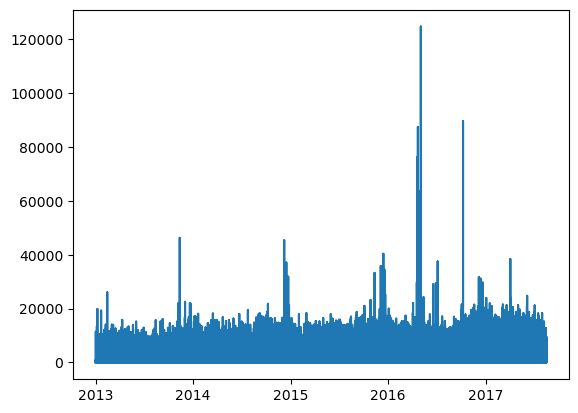

In [368]:
plt.plot(df_train_st_oil_holid["date"],df_train_st_oil_holid["sales"])

In [369]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_train_st_oil_holid,x="date",y="sales",hue="family")
plt.legend(bbox_to_anchor = [1.1, 1])

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000017480495438> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001748048FE58> (for post_execute):


KeyboardInterrupt: 

In [370]:
# The big spike around April 2016 corresponds to earthquake 
# We can see a periodic structure 
#Grocery sales dominate

In [371]:
sns.barplot(data=df_train_st_oil_holid,x="Wage_date",y="sales")

KeyboardInterrupt: 

In [ ]:
#There doesn't seem to be big difference between sales on wage days regular days

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_train_st_oil_holid,x="day_type",y="sales")

In [ ]:
#We can see that most of the sales are on Additional holidays that are days added a regular calendar holiday

In [ ]:
plt.xticks(rotation=90)
sns.barplot(data=df_train_st_oil_holid,x="family" ,y="sales")

In [ ]:
#We can see that Grocery 1 category is the most popular

In [ ]:
obj_feature=["family","city","state","store_type","day_type","locale","locale_name","description","transferred","Wage_date"]

In [ ]:
df_dummies=pd.get_dummies(df_train_st_oil_holid[obj_feature],drop_first=True)

In [ ]:
df_train_st_oil_holid=pd.concat([df_train_st_oil_holid,df_dummies],axis=1)

In [ ]:
df_train_st_oil_holid.set_index("date")

# For now we will use in model training only table from train.csv

In [1437]:
df_train.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           3000888 non-null  int64  
 1   date         3000888 non-null  object 
 2   store_nbr    3000888 non-null  int64  
 3   family       3000888 non-null  object 
 4   sales        3000888 non-null  float64
 5   onpromotion  3000888 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [1438]:
df_train["date"]=pd.to_datetime(df_train["date"])

In [1439]:
df_train=df_train.set_index(["date","store_nbr","family"])

In [1440]:
df_train.head(2)

id  sales  onpromotion
date       store_nbr family                            
2013-01-01 1         AUTOMOTIVE   0    0.0            0
                     BABY CARE    1    0.0            0

In [1441]:
df_train.groupby("date").mean()

,id,sales,onpromotion
date,,,
2013-01-01,890.5,1.409438,0.000000
2013-01-02,2672.5,278.390807,0.000000
2013-01-03,4454.5,202.840197,0.000000
2013-01-04,6236.5,198.911154,0.000000
2013-01-05,8018.5,267.873244,0.000000
...,...,...,...
2017-08-11,2992868.5,463.733851,7.956790
2017-08-12,2994650.5,444.798280,4.664422
2017-08-13,2996432.5,485.768618,5.209315


In [1442]:
df_group=df_train.groupby("date").mean()["sales"]

In [1443]:
df_train=df_group.to_frame()

In [1444]:
len(df_train)

1684

In [1445]:
#Lets also group table for test predictions
df_forpred=pd.read_csv("test.csv")
len(df_forpred)

28512

In [1446]:
df_forpred

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [1447]:
df_forpred["date"]=pd.to_datetime(df_forpred["date"])

In [1448]:
df_forpred=df_forpred.set_index(["date","store_nbr","family"])

In [1449]:
df_forpred=df_forpred.groupby("date").mean()

In [1450]:
len(df_forpred)

16

# Preparing data for model training

In [1451]:
#We need to predict for 16 days in 2017(2017-08-16 - 2017-08-31)

In [1452]:
#We select 2 years based on sales plot as function of time
df_train=df_train.loc['2015-08-15':'2017-08-15']

In [1453]:
df_train = df_train.round(2)

In [1454]:
#We will save data for last 2 months as test sample
test_ind=120

In [1455]:
train = df_train.iloc[:-test_ind]
test = df_train.iloc[-test_ind:]

In [1456]:
train

,sales
date,
2015-08-15,525.44
2015-08-16,512.82
2015-08-17,389.87
2015-08-18,353.24
2015-08-19,366.85
...,...
2017-04-13,413.60
2017-04-14,415.76
2017-04-15,504.27


# Scale data

In [1457]:
from sklearn.preprocessing import MinMaxScaler

In [1458]:
scaler=MinMaxScaler()

In [1459]:
scaler.fit(train)

MinMaxScaler()

In [1460]:
scaled_train=scaler.transform(train)

In [1461]:
scaled_test=scaler.transform(test)

In [1462]:
scaled_train.shape

(610, 1)

# Time Series generator

In [1463]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator



#We are using TimeseriesGenerator class that takes in a sequence of data-points gathered at equal intervals, 
#along with time series parameters such as stride, length of history, etc., to produce batches for training/validation.

In [1464]:
# define generator
length = 30 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [1465]:
len(scaled_train)

610

In [1466]:
len(generator) 

580

In [1467]:
# What does the first batch look like?
X,y = generator[0]

In [1468]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.63697881 0.62147989 0.47048204 0.42549586 0.44221062 0.38412036
 0.44190359 0.54527479 0.58833282 0.4614062  0.42220448 0.43280319
 0.36937059 0.42980657 0.59605772 0.66410807 0.52658274 0.61645686
 0.59748235 0.47899294 0.4991833  0.71729813 0.78260976 0.52054037
 0.45847099 0.47798588 0.38984341 0.44056494 0.6267731  0.69694811]
Predict this y: 
 [[0.46610992]]


In [1469]:
#Given sales for first 30 rows (X) predict sales on 31th(y)
scaled_train[30]

array([0.46610992])

# Create a model

In [1470]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [1471]:
scaled_train.shape #1 corresponds to number of columns to be predicted

(610, 1)

In [1472]:
#define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(100,input_shape=(length,scaled_train.shape[1])))

# Final Prediction (one neuron per feature)
model.add(Dense(scaled_train.shape[1]))

model.compile(optimizer='adam', loss='mse')

In [1473]:
scaled_train.shape[1]

1

In [1474]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100)               40800     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [1475]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=1)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length, batch_size=batch_size)

In [1476]:
model.fit_generator(generator,epochs=10,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/10


C:\Users\17573\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


580/580 [==============================] - 8s 11ms/step - loss: 0.0206 - val_loss: 0.0148
Epoch 2/10
580/580 [==============================] - 6s 11ms/step - loss: 0.0158 - val_loss: 0.0114
Epoch 3/10
580/580 [==============================] - 7s 11ms/step - loss: 0.0124 - val_loss: 0.0093
Epoch 4/10
580/580 [==============================] - 7s 11ms/step - loss: 0.0124 - val_loss: 0.0101


In [1477]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

<AxesSubplot:>

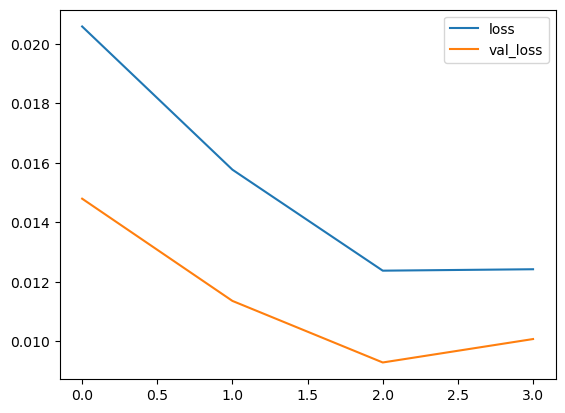

In [1478]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# Evaluate

In [1479]:
first_eval_batch = scaled_train[-length:]

In [1480]:
first_eval_batch = first_eval_batch.reshape((1, length, scaled_train.shape[1]))

In [1481]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 409ms/step


array([[0.56548804]], dtype=float32)

In [1482]:
scaled_test[0]

array([0.4859564])

### Lets predict into entire test range

In [1484]:
n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 18ms/step


In [1485]:
test_predictions

[array([0.56548804], dtype=float32),
 array([0.5902569], dtype=float32),
 array([0.6169981], dtype=float32),
 array([0.6366229], dtype=float32),
 array([0.6398793], dtype=float32),
 array([0.632067], dtype=float32),
 array([0.62513936], dtype=float32),
 array([0.6260581], dtype=float32),
 array([0.6336637], dtype=float32),
 array([0.64205134], dtype=float32),
 array([0.64597857], dtype=float32),
 array([0.64475733], dtype=float32),
 array([0.64169556], dtype=float32),
 array([0.64041], dtype=float32),
 array([0.64201665], dtype=float32),
 array([0.6450525], dtype=float32),
 array([0.64729214], dtype=float32),
 array([0.6476418], dtype=float32),
 array([0.64669144], dtype=float32),
 array([0.64579695], dtype=float32),
 array([0.64584565], dtype=float32),
 array([0.6467309], dtype=float32),
 array([0.6477148], dtype=float32),
 array([0.6481445], dtype=float32),
 array([0.6479591], dtype=float32),
 array([0.6475643], dtype=float32),
 array([0.64739233], dtype=float32),
 array([0.64757305]

In [1486]:
scaled_test

array([[0.4859564 ],
       [0.49872889],
       [0.45742708],
       [0.54011667],
       [0.66359226],
       [0.77739024],
       [0.51205404],
       [0.48719681],
       [0.53003377],
       [0.42235186],
       [0.54139392],
       [0.72790912],
       [0.70927848],
       [0.89223212],
       [0.61698496],
       [0.62865213],
       [0.48557568],
       [0.52978815],
       [0.70802579],
       [0.83756831],
       [0.52669328],
       [0.48499846],
       [0.51965613],
       [0.43871047],
       [0.51877188],
       [0.76147375],
       [0.60104391],
       [0.55889469],
       [0.54839423],
       [0.57155665],
       [0.42482039],
       [0.52494934],
       [0.70543445],
       [0.8200307 ],
       [0.52849862],
       [0.49005834],
       [0.50601167],
       [0.41903592],
       [0.67018729],
       [0.63414185],
       [0.72342647],
       [0.52703715],
       [0.5033712 ],
       [0.58303961],
       [0.52018422],
       [0.62463617],
       [0.80224747],
       [0.940

In [1487]:
#Inverse transformation and comparision

In [1514]:
true_predictions = scaler.inverse_transform(test_predictions)

In [1515]:
true_predictions

array([[467.22863693],
       [487.39670476],
       [509.17068374],
       [525.15020099],
       [527.80170886],
       [521.44057487],
       [515.79972035],
       [516.54780927],
       [522.74067907],
       [529.5703029 ],
       [532.76805061],
       [531.77365629],
       [529.28060894],
       [528.23384742],
       [529.54205665],
       [532.01399211],
       [533.83762267],
       [534.12231773],
       [533.34850627],
       [532.62017031],
       [532.65982184],
       [533.38063517],
       [534.18177076],
       [534.53164574],
       [534.38070786],
       [534.05922472],
       [533.91920678],
       [534.06635909],
       [534.35513092],
       [534.56387171],
       [534.58110095],
       [534.47432817],
       [534.38007693],
       [534.38376544],
       [534.469669  ],
       [534.56154212],
       [534.59779633],
       [534.57474312],
       [534.53310174],
       [534.51577543],
       [534.53387827],
       [534.56785142],
       [534.5907105 ],
       [534

In [1516]:
test["sales"]

date
2017-04-18    402.47
2017-04-19    412.87
2017-04-20    379.24
2017-04-21    446.57
2017-04-22    547.11
               ...  
2017-08-11    463.73
2017-08-12    444.80
2017-08-13    485.77
2017-08-14    427.00
2017-08-15    427.98
Name: sales, Length: 120, dtype: float64

In [1517]:
true_predictions = pd.DataFrame(data=true_predictions,columns=test.columns)

In [1519]:
true_predictions.index=test.index

In [1523]:
true_predictions

,sales,true sales
date,,
2017-04-18,467.228637,402.47
2017-04-19,487.396705,412.87
2017-04-20,509.170684,379.24
2017-04-21,525.150201,446.57
2017-04-22,527.801709,547.11
...,...,...
2017-08-11,534.587653,463.73
2017-08-12,534.587604,444.80
2017-08-13,534.587604,485.77


In [1522]:
true_predictions["true sales"]=test

In [1524]:
true_predictions.head(3)

,sales,true sales
date,,
2017-04-18,467.228637,402.47
2017-04-19,487.396705,412.87
2017-04-20,509.170684,379.24


<AxesSubplot:xlabel='date'>

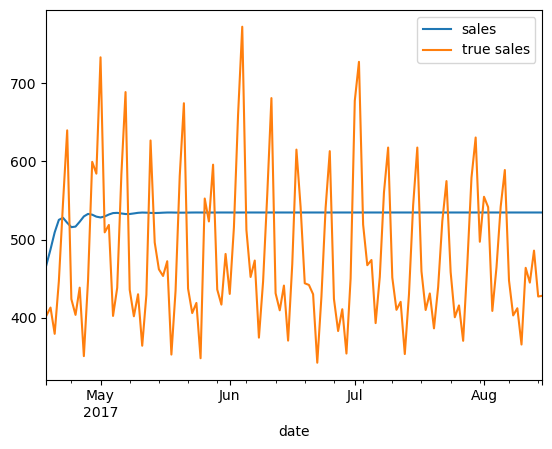

In [1525]:
true_predictions.plot()

# Saving the model

In [1496]:
from tensorflow.keras.models import load_model

In [1497]:
#Save model  in HDF5 file 
model.save("StoreSales_TimeSeriesForecast.h5")

## Predicting into future

In [1348]:
df_forpred

,id,onpromotion
date,,
2017-08-16,3001778.5,17.137486
2017-08-17,3003560.5,4.211560
2017-08-18,3005342.5,7.731201
2017-08-19,3007124.5,4.833895
2017-08-20,3008906.5,5.338384
2017-08-21,3010688.5,4.545455
2017-08-22,3012470.5,5.777217
2017-08-23,3014252.5,9.259259
2017-08-24,3016034.5,4.639731


In [1349]:
#Lets predict into future from 2017-08-16 - 2017-08-31

In [1526]:
full_scaler=MinMaxScaler()
scaled_full_data=full_scaler.fit_transform(df_train)

In [1527]:
length=12
generator=TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=1)

In [1528]:
#define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(100,input_shape=(length,scaled_full_data.shape[1])))

# Final Prediction (one neuron per feature)
model.add(Dense(scaled_full_data.shape[1]))

model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator,epochs=3)

Epoch 1/3


C:\Users\17573\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == "":


718/718 [==============================] - 6s 5ms/step - loss: 0.0198
Epoch 2/3
718/718 [==============================] - 4s 6ms/step - loss: 0.0150
Epoch 3/3
718/718 [==============================] - 4s 6ms/step - loss: 0.0120


In [1529]:
forecast=[]
periods=12

first_eval_batch=scaled_full_data[-length:]
current_batch=first_eval_batch.reshape(1,length,n_features)

for i in range(len(df_forpred)):
    
    current_pred=model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)#remove first item from the batch and append new prediction at the end

1/1 [==============================] - 0s 17ms/step


In [1530]:
true_forecast = scaler.inverse_transform(forecast)

In [1534]:
true_forecast = pd.DataFrame(data=true_forecast,columns=["sales"],index=df_forpred.index)

In [1535]:
true_forecast

,sales
date,
2017-08-16,385.818008
2017-08-17,378.077903
2017-08-18,392.342698
2017-08-19,415.099351
2017-08-20,424.986753
2017-08-21,418.969330
2017-08-22,403.481744
2017-08-23,386.290987
2017-08-24,381.090327


(17348.0, 17409.0)

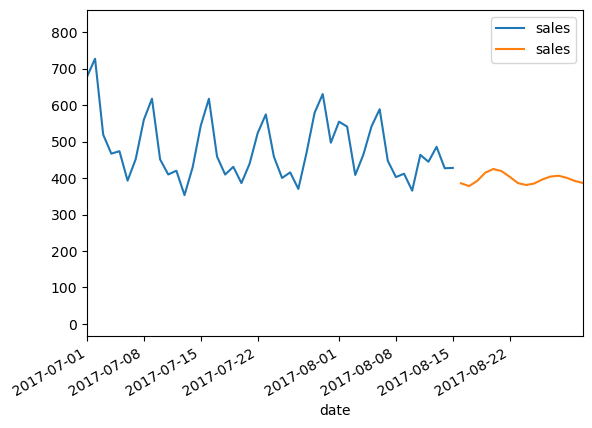

In [1541]:
ax=df_train.plot()
true_forecast.plot(ax=ax)
#plt.xlim("2015-10-01","2017-08-31")
plt.xlim("2017-07-01","2017-08-31")

In [1538]:
scaled_full_data

array([[0.63697881],
       [0.62147989],
       [0.47048204],
       [0.42549586],
       [0.44221062],
       [0.38412036],
       [0.44190359],
       [0.54527479],
       [0.58833282],
       [0.4614062 ],
       [0.42220448],
       [0.43280319],
       [0.36937059],
       [0.42980657],
       [0.59605772],
       [0.66410807],
       [0.52658274],
       [0.61645686],
       [0.59748235],
       [0.47899294],
       [0.4991833 ],
       [0.71729813],
       [0.78260976],
       [0.52054037],
       [0.45847099],
       [0.47798588],
       [0.38984341],
       [0.44056494],
       [0.6267731 ],
       [0.69694811],
       [0.46610992],
       [0.46178692],
       [0.50311329],
       [0.40076144],
       [0.44225975],
       [0.63667178],
       [0.70672398],
       [0.48631256],
       [0.43406816],
       [0.4674977 ],
       [0.37576911],
       [0.43694197],
       [0.60537918],
       [0.69330058],
       [0.45429536],
       [0.41147068],
       [0.48180534],
       [0.540